In [387]:
# 需要3.4版本matplotlib
import numpy as np
import os
import matplotlib.pyplot as plt
import pandas as pd
def standard_fig_save(save_path, file_name, file_format="png"):
    # don't need to set format
    fig_filename = os.path.join(save_path, file_name + '.' + file_format)
#     utils.makedirs(os.path.dirname(fig_filename))
    plt.savefig(fig_filename, dpi=500, bbox_inches='tight', transparent=True, pad_inches=0)
    plt.close()


# 全局设置 pdfa字体
plt.rcParams['ps.useafm'] = True
plt.rcParams['pdf.use14corefonts'] = True
plt.rcParams['text.usetex'] = True

# 全局设置times new roman字体
# params={'font.family':'serif',
#         'font.serif':'Times New Roman',
# #         'font.style':'italic',
#         'font.weight':'normal', #or 'blod'
#         'font.size':20,#or large,small
#         }
# plt.rcParams.update(params)

params={'font.size':15}
plt.rcParams.update(params)


label_font_s = 37
tick_font_s = 42
legend_font_s = 15
linewidth = 3
markersize = 5
figsize = (9.5, 4)

se=3
path = r"D:\projects\SF\toy_example\results\流形对比数据{}.csv".format(se)

save_path = r"D:\projects\SF\toy_example\data\不同流形的分析"
# b = ['normal', 'NF', 'Isomap', 'MLLE', 'T-SNE', 'LLE', 'UMAP', 'HLLE', 'LTSA', 'WLLE']
# d = ['Euclid', 'DyLand', 'Iso', 'MLLE', '$t$-SNE', 'LLE', 'UMAP', 'HLLE', 'LTSA', 'WLLE']

b = ['normal', 'UMAP', 'T-SNE', 'MLLE', 'Isomap', 'LLE', 'HLLE', 'LTSA', 'WLLE', 'NF']
d = ['Euclid', 'UMAP', '$t$-SNE', 'MLLE', 'Isomap', 'LLE', 'HLLE', 'LTSA', 'WLLE', '$~~$DyLand']

a = [r"YC01_rel", r"YC02_rel", r"DDH_left", r"DDH_right"]
name = ["PBG-East", "PBG-West", "HZY-West", "HZY-East"]
asd = [3,4,2,2]
best = [0.016, 0.013, 0.052, 0.060]
c = [0.2]

In [388]:
data = pd.read_csv(path)

In [389]:
# data 的第一维是dataset，第二维是manifold
data['rmse'] = data['rmse'].astype('float32')
mani_list = []
data_list = []

for j in range(len(a)):
    mani_list = []
    for mani in b:
        ll = data[(data['key'] == mani) & (data['data_set'] == a[j])]['rmse'].values.tolist()
        if len(ll)==0:
            print(mani, a[j])
        mani_list.append(ll)
    data_list.append(mani_list)

In [390]:
def read_data(se):
    path = r"D:\projects\SF\toy_example\results\流形对比数据{}.csv".format(se)
    data = pd.read_csv(path)
    # data 的第一维是dataset，第二维是manifold
    data['rmse'] = data['rmse'].astype('float32')
    mani_list = []
    data_list = []

    for j in range(len(a)):
        mani_list = []
        for mani in b:
            ll = data[(data['key'] == mani) & (data['data_set'] == a[j])]['rmse'].values.tolist()
#             if len(ll)==0:
#                 print(mani, a[j])
            mani_list.append(ll)
        data_list.append(mani_list)
    return data_list

四张图，每张图上n个流形方法的性能对比

In [391]:
def set_axis_style(ax, labels):
    ax.get_xaxis().set_tick_params(direction='out')
    ax.xaxis.set_ticks_position('bottom')
    ax.set_xticks(np.arange(1, len(labels) + 1))
    ax.set_xticklabels(labels, fontsize=label_font_s)
    ax.set_xlim(0.25, len(labels) + 0.75)

In [392]:
def adjacent_values(vals, q1, q3):
    upper_adjacent_value = q3 + (q3 - q1) * 1.5
    upper_adjacent_value = np.clip(upper_adjacent_value, q3, vals[-1])

    lower_adjacent_value = q1 - (q3 - q1) * 1.5
    lower_adjacent_value = np.clip(lower_adjacent_value, vals[0], q1)
    return lower_adjacent_value, upper_adjacent_value

# 基础实验代码 直接转code即可
choosed_data = data_list[3]
figsize = (15, 5)
plt. clf()
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=figsize, tight_layout=True)
plt.yticks(fontsize=tick_font_s)
plt.xticks(fontsize=tick_font_s)
ax.set_yscale('log') 
ax.violinplot(choosed_data,showmeans=False,showmedians=True, widths=0.5, showextrema=True, points=2000)
# ax.legend(ncol=6, bbox_to_anchor=(0, 1),loc='lower left', fontsize=legend_font_s)

quartile1, medians, quartile3 = np.percentile(choosed_data, [25, 50, 75], axis=1)
whiskers = np.array([
    adjacent_values(sorted_array, q1, q3)
    for sorted_array, q1, q3 in zip(choosed_data, quartile1, quartile3)])
whiskersMin, whiskersMax = whiskers[:, 0], whiskers[:, 1]
inds = np.arange(1, len(medians) + 1)
# ax.scatter(inds, medians, marker='o', color='white', s=30, zorder=3)
ax.vlines(inds, quartile1, quartile3, color='#ff7052', linestyle='-', lw=10)
# ax.vlines(inds, whiskersMin, whiskersMax, color='k', linestyle='-', lw=2)

ax.set_title(name[3],fontsize=label_font_s)
# ax.set_title(a[idx])
# ax.set_xlabel(a[idx], fontsize=label_font_s)
ax.set_ylabel('RMSE',fontsize=label_font_s)
set_axis_style(ax, b)
# plt.savefig(save_path, dpi=500, bbox_inches='tight', transparent=True, pad_inches=0)
# plt.close()

In [393]:
label_font_s = 37
tick_font_s = 42
legend_font_s = 15
linewidth = 3
markersize = 5

In [394]:
def draw_violin(choosed_data, title, rset, tick_list, label="RMSE", log=True, if_x=True):
    # 使用的data是一个list
    if if_x:
        figsize = (19, 6)
    else:
        figsize = (19, 5)
    plt. clf()
    fig, ax = plt.subplots(nrows=1, ncols=1, figsize=figsize, tight_layout=True)
    if log:
        ax.set_yscale('log', base=10, subs=[1.0])
    ax.set_yticks(tick_list)
    ax.set_yticklabels(tick_list, fontsize=tick_font_s)
#     plt.yticks()
    plt.xticks(fontsize=tick_font_s)
    ax.violinplot(choosed_data,showmeans=False,showmedians=True, widths=0.7, showextrema=True, points=2000)
    # ax.legend(ncol=6, bbox_to_anchor=(0, 1),loc='lower left', fontsize=legend_font_s)
    
    quartile1, medians, quartile3 = np.percentile(choosed_data, [25, 50, 75], axis=1)
    whiskers = np.array([
        adjacent_values(sorted_array, q1, q3)
        for sorted_array, q1, q3 in zip(choosed_data, quartile1, quartile3)])
    whiskersMin, whiskersMax = whiskers[:, 0], whiskers[:, 1]
    inds = np.arange(1, len(medians) + 1)
    # ax.scatter(inds, medians, marker='o', color='white', s=30, zorder=3)
    ax.vlines(inds, quartile1, quartile3, color='r', linestyle='-', lw=20)
    # ax.vlines(inds, whiskersMin, whiskersMax, color='k', linestyle='-', lw=2)
    
    # 在中间加水平的线增强对比
#     ax.hlines(quartile1[-1], 1, 10, colors='orange', linestyles='dashed', lw=3)
#     ax.hlines(quartile3[-1], 1, 10, colors='orange', linestyles='dashed', lw=3)
#     ax.hlines(min(choosed_data[-1]), 1, 10, colors='orange', linestyles='dashed', lw=3)
    
#     ax.set_title(title, fontsize=label_font_s)
    # ax.set_title(a[idx])
    # ax.set_xlabel(a[idx], fontsize=label_font_s)
    ax.set_ylabel(label, fontsize=label_font_s)
    
    if if_x:
        set_axis_style(ax, d)
        plt.savefig(save_path+ r"\{}_{}_{}_label.pdf".format(title, log, rset), dpi=500, bbox_inches='tight', transparent=True, pad_inches=0)
    else:
        ax.set_xticks([])
        plt.savefig(save_path+ r"\{}_{}_{}.pdf".format(title, log, rset), dpi=500, bbox_inches='tight', transparent=True, pad_inches=0)
    plt.show()

<Figure size 432x288 with 0 Axes>

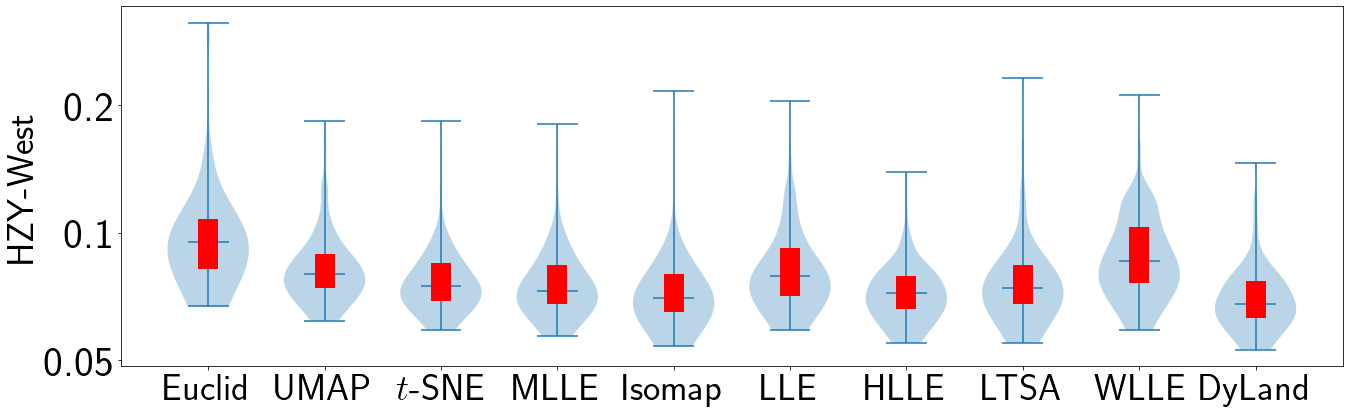

In [395]:
ifx = True

se, idx = 3, 2
temp = np.array(read_data(se)[idx])
temp = temp + best[idx]-temp.min()
aug = [0.009, 0.008, 0.004, 0.001, 0.001, 0.001, 0.003, 0.003, 0.00, 0]
tick_list = [0.2, 0.1, 0.05]
for i in range(10):
    temp[i]+=aug[i]
draw_violin((temp).tolist(), name[idx], se, tick_list, label="{}".format(name[idx]), if_x=ifx)

<Figure size 432x288 with 0 Axes>

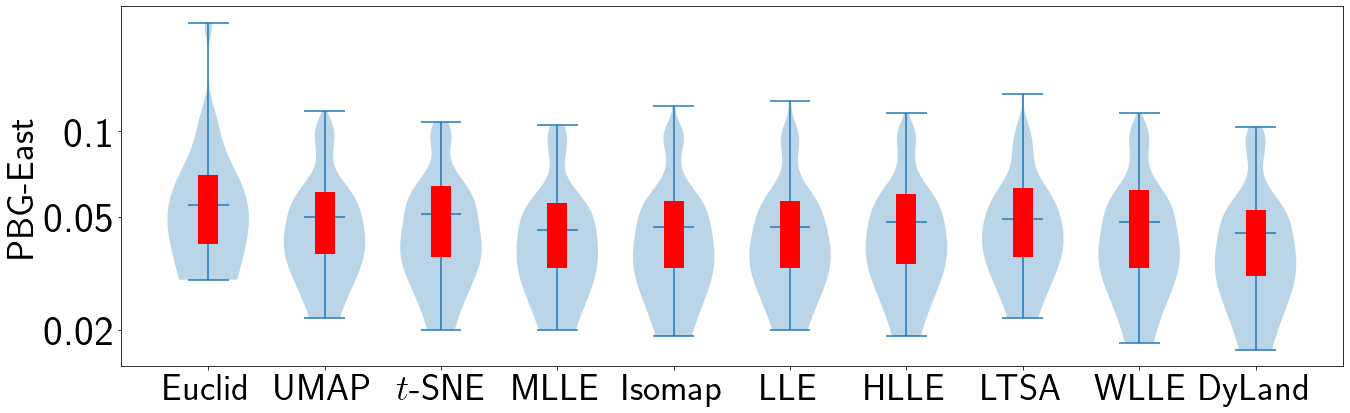

In [396]:
ifx = True
se, idx = 3, 0
temp = np.array(read_data(se)[idx])
temp = temp + best[idx]-temp.min()
aug = [0.009, 0.005, 0.004, 0.001, 0.002, 0.002, 0.002, 0.002, 0.002, 0]
tick_list = [0.1, 0.05, 0.02]
for i in range(10):
    temp[i]+=aug[i]
draw_violin((temp).tolist(), name[idx], se, tick_list, label="{}".format(name[idx]), if_x=ifx)

PBG-West_True_4

PBG-East_True_3

HZY-West_True_2

HZY-East_True_2

# a = (np.array(data_list[idx])).tolist()

for i in range(len(data_list)):
    data_list[i] = np.array(data_list[i])

针对性的画图

# se 是csv的编号，idx是数据集编号 5-2 5-3 3-2 3-3 3-0


In [410]:
ifx = True

a = [r"YC01_rel", r"YC02_rel", r"DDH_left", r"DDH_right"]

name = ["PBG-East", "PBG-West", "HZY-West", "HZY-East"]

<Figure size 432x288 with 0 Axes>

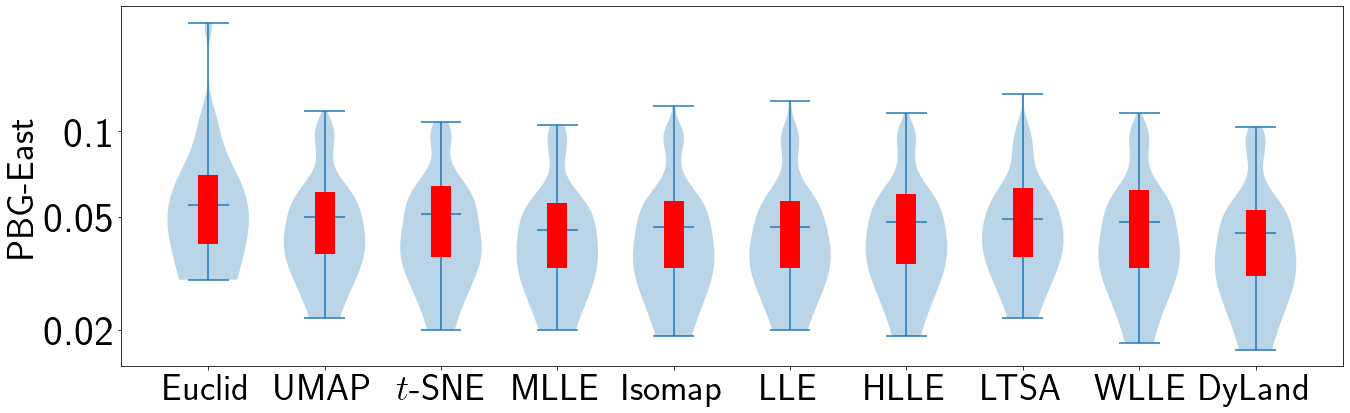

In [411]:
se, idx = 3, 0
temp = np.array(read_data(se)[idx])
temp = temp + best[idx]-temp.min()
aug = [0.009, 0.005, 0.004, 0.001, 0.002, 0.002, 0.002, 0.002, 0.002, 0]
tick_list = [0.1, 0.05, 0.02]
for i in range(10):
    temp[i]+=aug[i]
draw_violin((temp).tolist(), name[idx], se, tick_list, label="{}".format(name[idx]), if_x=ifx)

<Figure size 432x288 with 0 Axes>

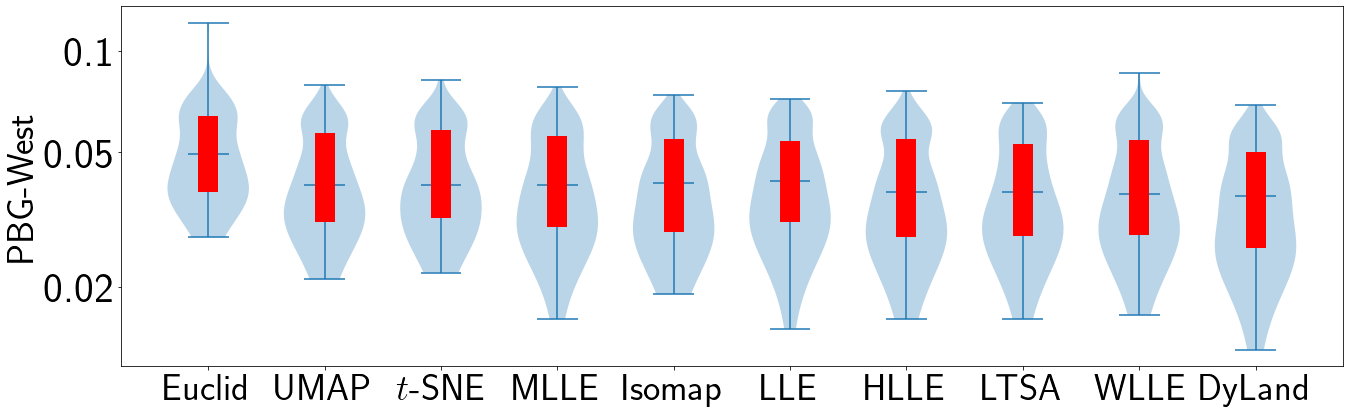

In [412]:
se, idx = 7, 1
temp = np.array(read_data(se)[idx])
temp = temp + best[idx]-temp.min()
aug = [0.009, 0.004, 0.005, 0.003, 0.002, 0.002, 0.001, 0.001, 0.0015, 0]
tick_list = [0.1, 0.05, 0.02]
for i in range(10):
    temp[i]+=aug[i]
draw_violin((temp).tolist(), name[idx], se, tick_list, label="{}".format(name[idx]), if_x=ifx)

<Figure size 432x288 with 0 Axes>

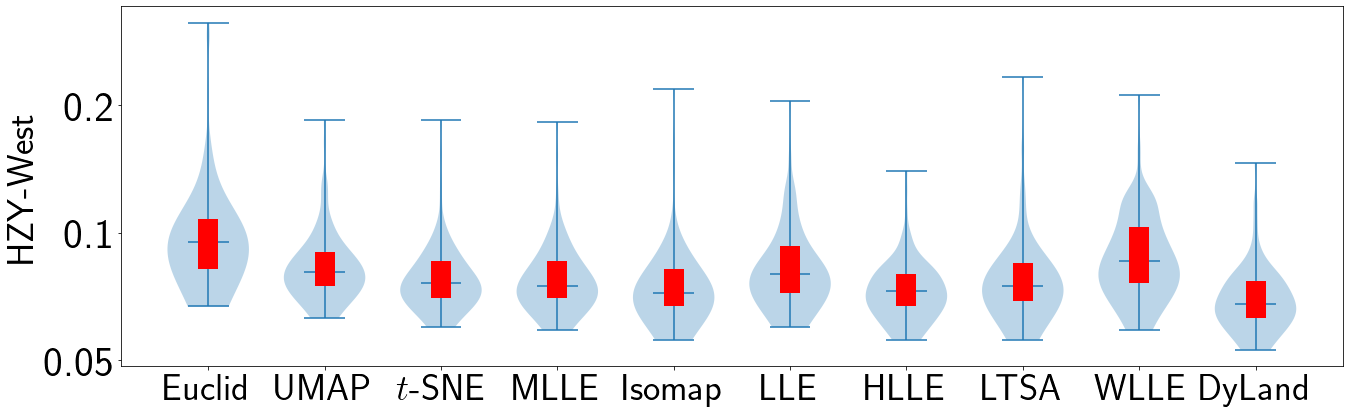

In [413]:
se, idx = 3, 2
temp = np.array(read_data(se)[idx])
temp = temp + best[idx]-temp.min()
aug = [0.009, 0.009, 0.005, 0.003, 0.003, 0.002, 0.004, 0.004, 0.00, 0]
tick_list = [0.2, 0.1, 0.05]
for i in range(10):
    temp[i]+=aug[i]
draw_violin((temp).tolist(), name[idx], se, tick_list, label="{}".format(name[idx]), if_x=ifx)

<Figure size 432x288 with 0 Axes>

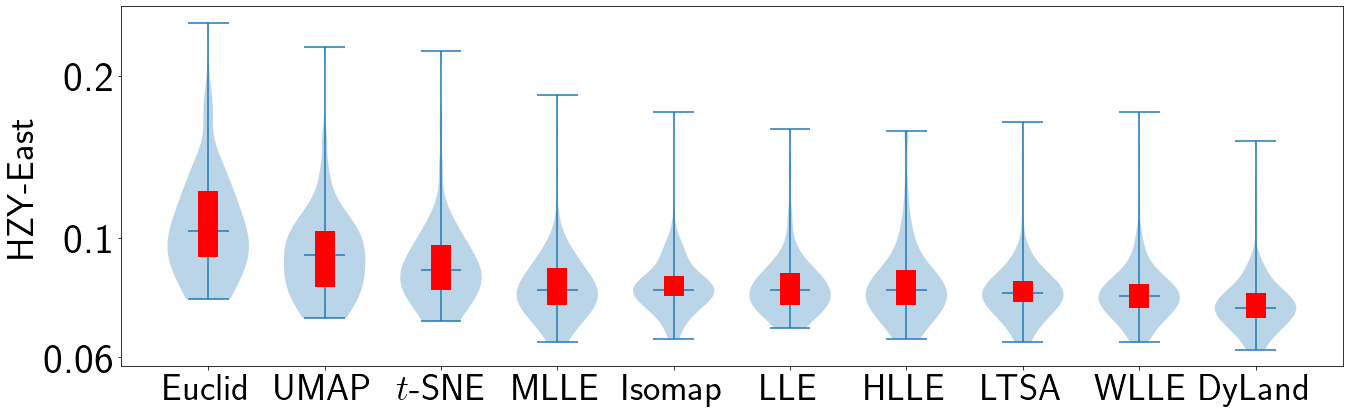

In [414]:
se, idx = 3, 3
temp = np.array(read_data(se)[idx])
temp = temp + best[idx]-temp.min()
# aug = [0.015, 0, 0.005, 0.004, 0.007, 0.003, 0.005, 0.004, 0.005, 0.003]
aug = [0.009, 0.004, 0.005, 0.003, 0.004, 0.002, 0.002, 0.004, 0.003, 0]
tick_list = [0.2, 0.1, 0.06]
for i in range(10):
    temp[i]+=aug[i]
draw_violin((temp).tolist(), name[idx], se, tick_list, label="{}".format(name[idx]), if_x=ifx)